In [233]:
import json
import pandas as pd
import seaborn as sns

In [234]:
def jread(path):
    with open(path,) as f:
        return json.load(f)
    
def as_dict(j_dat):
    for key in j_dat:
        s = key.split('_')
        if s[0] == 'delta':
            continue
        for value in j_dat[key]:
            yield {
                'advertiser': s[1],
                'C': s[2],
                'regularization': s[-1].split('=')[1],
                'bins': int(s[-3].split('=')[1]),
                'features': int(s[-4].split('=')[1]),
                'result': float(value)
            }

def load(file):
    dat = list(as_dict(jread(file)))
    df = pd.DataFrame.from_dict(dat)
    df['label'] = df['C'] + '_' + df['regularization']
    
    clusters = 6

    for adv in df.advertiser.unique():
        kmeans = cluster.KMeans(n_clusters=clusters)
        dat = df[df.advertiser == adv]['features'].to_numpy()
        fp =  kmeans.fit_predict(dat.reshape(-1, 1))
        df.loc[df.advertiser == adv, 'f_cluster'] = fp

    df['f_cluster'] = df['f_cluster'].astype(int)

    for adv in df.advertiser.unique():
        df.loc[df.advertiser == adv, 'mean_features'] =\
        df[df.advertiser == adv].groupby('f_cluster')['features'].mean()
        mean_features = df.mean_features.unique()
        mean_features.sort()
        for idx, mf in enumerate(mean_features):
            df.loc[(df.advertiser == adv) & (df.mean_features == mf), 'f_cluster'] = idx
    return df

# def normalize(df, norm_to='None_L2'):
#     for adv in df.advertiser.unique():
#         for f_clus in df.f_cluster.unique():
#             f = (df.advertiser == adv) & (df.f_cluster == f_clus)
#             df_norm = df[f & (df.label == norm_to)]
# #             print(f'normalizing {adv}-{f_clus} - {df_norm.shape[0]}')
#             mean = df_norm['result'].mean()
#             std = df_norm['result'].std()
#             df.loc[f, 'n_result'] = (df.loc[f, 'result'] - mean) / std
#     return df

def normalize(df, norm_to='None_L2'):
    for adv in df.advertiser.unique():
        df_norm = df[(df.f_cluster == 0) & (df.label == norm_to)]
#             print(f'normalizing {adv}-{f_clus} - {df_norm.shape[0]}')
        mean = df_norm['result'].mean()
        std = df_norm['result'].std()
        
        for f_clus in df.f_cluster.unique():
            f = (df.advertiser == adv) & (df.f_cluster == f_clus)

            df.loc[f, 'n_result'] = (df.loc[f, 'result'] - mean) / std
    return df


In [235]:
df[(df.advertiser == '3476') & (df.f_cluster == 0) & (df.label=='None_L2')]

,advertiser,C,regularization,bins,features,result,label,f_cluster,mean_features,n_result,n,int_C
0,3476,None,None,1,42,56.134958,None_L2,0,42.0,-0.883062,0,0
6,3476,None,None,1,42,56.681321,None_L2,0,NaN,-0.805092,0,0
7,3476,None,None,1,42,57.008775,None_L2,0,NaN,-0.758362,0,0
8,3476,None,None,1,42,57.508012,None_L2,0,NaN,-0.687118,0,0
9,3476,None,None,1,42,57.638445,None_L2,0,NaN,-0.668504,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
377,3476,None,None,5,88,60.120644,None_L2,0,NaN,-0.314276,0,0
378,3476,None,None,5,88,58.593441,None_L2,0,NaN,-0.532219,0,0
379,3476,None,None,5,88,59.585834,None_L2,0,NaN,-0.390597,0,0
380,3476,None,None,5,88,57.448723,None_L2,0,NaN,-0.695578,0,0


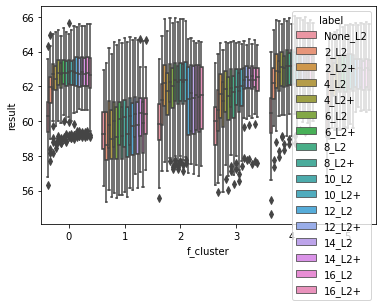

In [126]:
adv = '3476' 
b = sns.boxplot(data = df[(df.advertiser == adv)],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')

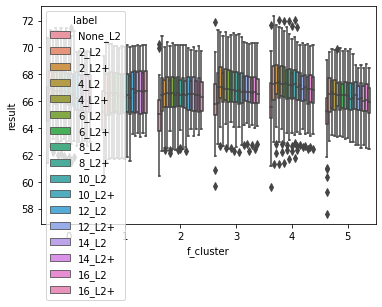

In [127]:
adv = '2259'
b = sns.boxplot(data = df[(df.advertiser == adv)],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')


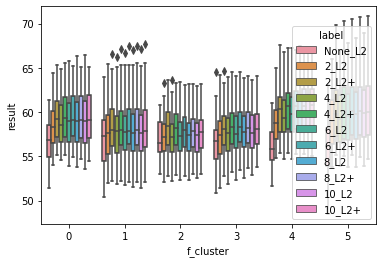

In [112]:
adv = '2261'
b = sns.boxplot(data = df[(df.advertiser == adv)],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')


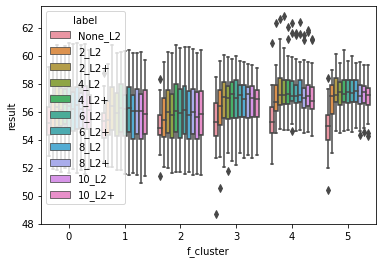

In [113]:
adv =  '2821'
b = sns.boxplot(data = df[(df.advertiser == adv)],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')

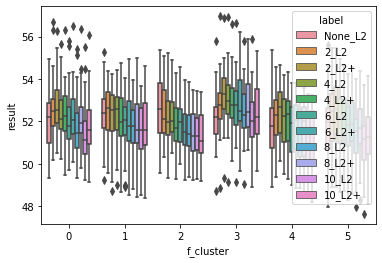

In [114]:
adv =  '2997'
b = sns.boxplot(data = df[(df.advertiser == adv)],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')

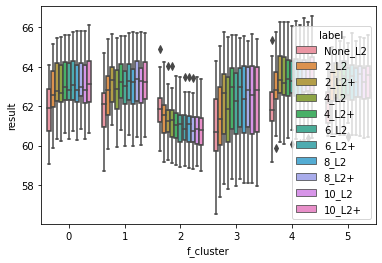

In [115]:
adv = '1458'
b = sns.boxplot(data = df[(df.advertiser == adv)],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')

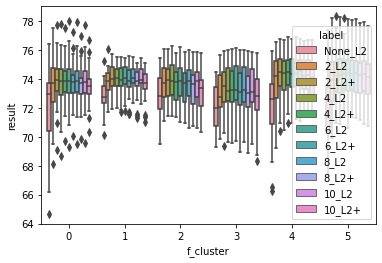

In [116]:
adv = '3386'
b = sns.boxplot(data = df[(df.advertiser == adv)],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')

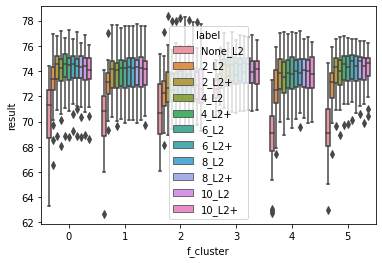

In [117]:
adv = '3358'
b = sns.boxplot(data = df[(df.advertiser == adv)],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')

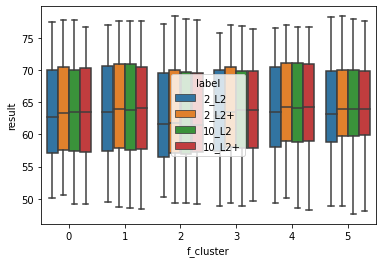

In [118]:
b = sns.boxplot(data = df[((df.C == '2') | (df.C == '10') | (df.C == '15') | (df.C == '2')) ],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')

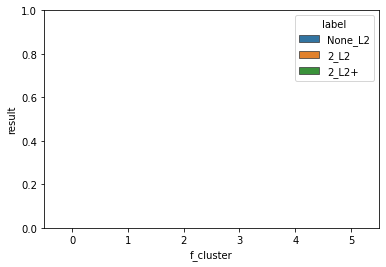

In [57]:
b = sns.boxplot(data = df[((df.C == '2') | (df.C == '10') | (df.C == '15') | (df.C == 'None'))],
                hue = 'label', # different colors for different 'cls'
                x = 'f_cluster',
                y = 'result')

normalizing 3476-5 - 19
normalizing 3476-1 - 16
normalizing 3476-0 - 8
normalizing 3476-2 - 10
normalizing 3476-4 - 21
normalizing 3476-3 - 16
normalizing 2259-5 - 20
normalizing 2259-1 - 15
normalizing 2259-0 - 15
normalizing 2259-2 - 15
normalizing 2259-4 - 10
normalizing 2259-3 - 15
normalizing 2261-5 - 7
normalizing 2261-1 - 24
normalizing 2261-0 - 15
normalizing 2261-2 - 15
normalizing 2261-4 - 14
normalizing 2261-3 - 15
normalizing 2821-5 - 7
normalizing 2821-1 - 15
normalizing 2821-0 - 15
normalizing 2821-2 - 15
normalizing 2821-4 - 23
normalizing 2821-3 - 15
normalizing 2997-5 - 21
normalizing 2997-1 - 14
normalizing 2997-0 - 15
normalizing 2997-2 - 15
normalizing 2997-4 - 10
normalizing 2997-3 - 15
normalizing 1458-5 - 16
normalizing 1458-1 - 12
normalizing 1458-0 - 15
normalizing 1458-2 - 15
normalizing 1458-4 - 17
normalizing 1458-3 - 15
normalizing 3358-5 - 20
normalizing 3358-1 - 15
normalizing 3358-0 - 12
normalizing 3358-2 - 15
normalizing 3358-4 - 13
normalizing 3358-3 

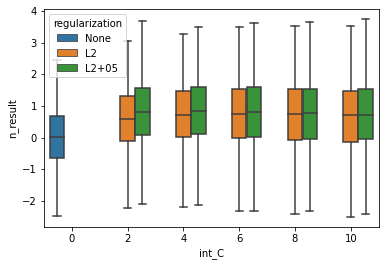

In [104]:
df = load_and_normalize('experiment_output_K=A_L=05a_P=0_ES=1.json')
df.loc[df.regularization=='L2+', 'regularization'] = 'L2+05'
# df = df[df.advertiser == '3476']
df['n'] = 0
df['int_C'] = 0
df.loc[df.C == 'None', 'regularization'] = 'None'
df.loc[df.C != 'None', 'int_C'] = df.loc[df.C != 'None', 'C'].astype('int')
b = sns.boxplot(data = df,
                hue = 'regularization', # different colors for different 'cls'
                x = 'int_C',
                y = 'n_result', showfliers = False)

normalizing 3476-0 - 10
normalizing 3476-3 - 16
normalizing 3476-2 - 16
normalizing 3476-1 - 9
normalizing 3476-4 - 27
normalizing 3476-5 - 12
normalizing 2259-0 - 15
normalizing 2259-3 - 16
normalizing 2259-2 - 15
normalizing 2259-1 - 15
normalizing 2259-4 - 10
normalizing 2259-5 - 19
normalizing 2261-0 - 24
normalizing 2261-3 - 15
normalizing 2261-2 - 15
normalizing 2261-1 - 15
normalizing 2261-4 - 13
normalizing 2261-5 - 8
normalizing 2821-0 - 21
normalizing 2821-3 - 15
normalizing 2821-2 - 15
normalizing 2821-1 - 15
normalizing 2821-4 - 15
normalizing 2821-5 - 9
normalizing 2997-0 - 20
normalizing 2997-3 - 15
normalizing 2997-2 - 15
normalizing 2997-1 - 15
normalizing 2997-4 - 17
normalizing 2997-5 - 8
normalizing 1458-0 - 15
normalizing 1458-3 - 15
normalizing 1458-2 - 15
normalizing 1458-1 - 16
normalizing 1458-4 - 12
normalizing 1458-5 - 17
normalizing 3358-0 - 24
normalizing 3358-3 - 15
normalizing 3358-2 - 15
normalizing 3358-1 - 15
normalizing 3358-4 - 15
normalizing 3358-5 -

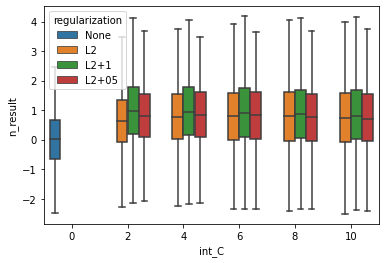

In [105]:
df = load_and_normalize('experiment_output_K=A_L=1a_P=0_ES=1.json').append(df)
df.loc[df.regularization=='L2+', 'regularization'] = 'L2+1'
# df = df[df.advertiser == '3476']
df['n'] = 0
df['int_C'] = 0
df.loc[df.C == 'None', 'regularization'] = 'None'
df.loc[df.C != 'None', 'int_C'] = df.loc[df.C != 'None', 'C'].astype('int')
b = sns.boxplot(data = df,
                hue = 'regularization', # different colors for different 'cls'
                x = 'int_C',
                y = 'n_result', showfliers = False)

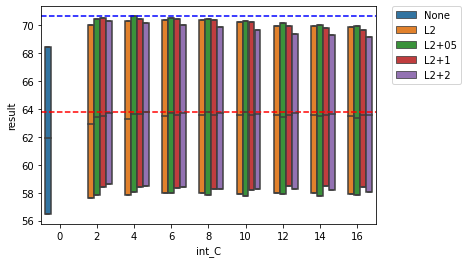

In [184]:
import matplotlib.pyplot as plt

df0 = load('experiment_output_K=A_L=05a_P=0_ES=1.json')\
.append(load('experiment_output_K=A_L=05a_P=1_ES=1.json'))
df1 = load('experiment_output_K=A_L=1a_P=0_ES=1.json')\
.append(load('experiment_output_K=A_L=1a_P=1_ES=1.json'))
df2 = load('experiment_output_K=A_L=2a_P=0_ES=1.json')\
.append(load('experiment_output_K=A_L=2a_P=1_ES=1.json'))
df0.loc[df0.regularization=='L2+', 'regularization'] = 'L2+05'
df1.loc[df1.regularization=='L2+', 'regularization'] = 'L2+1'
df2.loc[df2.regularization=='L2+', 'regularization'] = 'L2+2'

df = normalize(df0.append(df1).append(df2), norm_to='None_L2')
# df = df[df.advertiser == '3476']
df['n'] = 0
df['int_C'] = 0
df.loc[df.C == 'None', 'regularization'] = 'None'
df.loc[df.C != 'None', 'int_C'] = df.loc[df.C != 'None', 'C'].astype('int')
b = sns.boxplot(data = df,
                hue = 'regularization', # different colors for different 'cls'
                x = 'int_C',
                y = 'result', showfliers = False, whis=0)

b.axhline(float(df.groupby(['regularization', 'int_C'])[['result']].median().max()), ls='--', color='red')
b.axhline(float(df.groupby(['regularization', 'int_C'])[['result']].quantile(q=0.75).max()), ls='--', color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


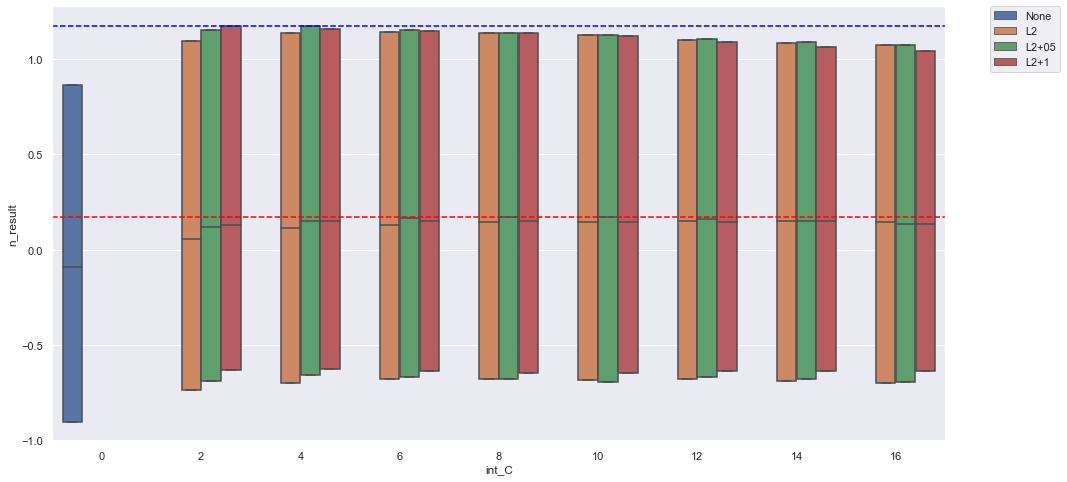

In [236]:
import matplotlib.pyplot as plt

df0 = load('experiment_output_K=A_L=05a_P=0_ES=1.json')\
.append(load('experiment_output_K=A_L=05a_P=1_ES=1.json'))\
.append(load('experiment_output_K=A_L=05a_P=2_ES=1.json'))
df1 = load('experiment_output_K=A_L=1a_P=0_ES=1.json')\
.append(load('experiment_output_K=A_L=1a_P=1_ES=1.json'))\
.append(load('experiment_output_K=A_L=1a_P=2_ES=1.json'))
df2 = load('experiment_output_K=A_L=2a_P=0_ES=1.json')\
.append(load('experiment_output_K=A_L=2a_P=1_ES=1.json'))\
.append(load('experiment_output_K=A_L=2a_P=2_ES=1.json'))
df0.loc[df0.regularization=='L2+', 'regularization'] = 'L2+05'
df1.loc[df1.regularization=='L2+', 'regularization'] = 'L2+1'
df2.loc[df2.regularization=='L2+', 'regularization'] = 'L2+2'

df = normalize(df0.append(df1).append(df2), norm_to='None_L2')
# df = df[df.advertiser == '3476']
df['n'] = 0
df['int_C'] = 0
df.loc[df.C == 'None', 'regularization'] = 'None'
df.loc[df.C != 'None', 'int_C'] = df.loc[df.C != 'None', 'C'].astype('int')
b = sns.boxplot(data = df[(df.regularization=='L2') | 
                          (df.regularization=='L2+05') | 
                          (df.regularization=='L2+1') | 
                          (df.regularization=='None')],
                hue = 'regularization', # different colors for different 'cls'
                x = 'int_C',
                y = 'n_result', showfliers = False, whis=0)

b.axhline(float(df.groupby(['regularization', 'int_C'])[['n_result']].median().max()), ls='--', color='red')
b.axhline(float(df.groupby(['regularization', 'int_C'])[['n_result']].quantile(q=0.75).max()), ls='--', color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


(62.0, 65.0)

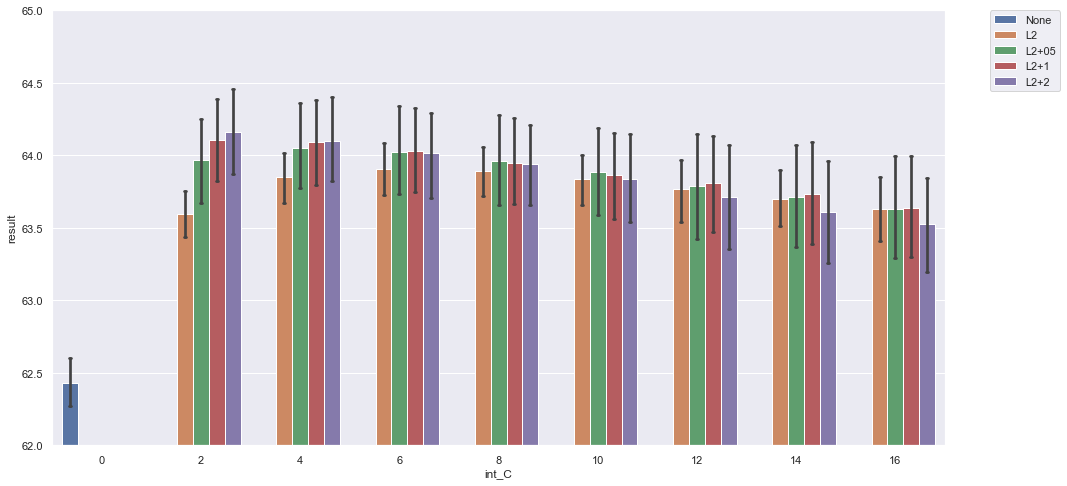

In [237]:
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.set_context("paper")
sns.set(rc={'figure.figsize':(16,8)})
b = sns.barplot(data = df,
                hue = 'regularization', # different colors for different 'cls'
                x = 'int_C',
                y = 'result', capsize=.02)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(62, 65)

In [221]:
df.groupby(['int_C', 'regularization'])['result'].mean()

int_C  regularization
0      None              62.431715
2      L2                63.587798
       L2+05             63.951724
       L2+1              64.086707
       L2+2              64.163416
4      L2                63.845762
       L2+05             64.040738
       L2+1              64.072039
       L2+2              64.097193
6      L2                63.895411
       L2+05             64.010924
       L2+1              64.009468
       L2+2              64.019566
8      L2                63.880936
       L2+05             63.948311
       L2+1              63.925261
       L2+2              63.940227
10     L2                63.828574
       L2+05             63.870677
       L2+1              63.839457
       L2+2              63.833005
12     L2                63.748094
       L2+05             63.748601
       L2+1              63.800640
       L2+2              63.687289
14     L2                63.679432
       L2+05             63.670856
       L2+1              63.72275

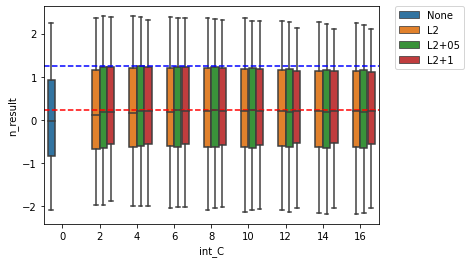

In [207]:
import matplotlib.pyplot as plt
b = sns.boxplot(data = df[(df.regularization=='L2') | 
                          (df.regularization=='L2+05') | 
                          (df.regularization=='L2+1') | 
                          (df.regularization=='None')],
                hue = 'regularization', # different colors for different 'cls'
                x = 'int_C',
                y = 'n_result', showfliers = False)

b.axhline(float(df.groupby(['regularization', 'int_C'])[['n_result']].median().max()), ls='--', color='red')
b.axhline(float(df.groupby(['regularization', 'int_C'])[['n_result']].quantile(q=0.75).max()), ls='--', color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [196]:
df.groupby(['regularization', 'int_C'])[['n_result']].median()


n_result
regularization int_C          
L2             2      0.119353
               4      0.173183
               6      0.197955
               8      0.212662
               10     0.212851
               12     0.214953
               14     0.211799
               16     0.205123
L2+05          2      0.190192
               4      0.221761
               6      0.234378
               8      0.243031
               10     0.239904
               12     0.193777
               14     0.197051
               16     0.185054
L2+1           2      0.200329
               4      0.219144
               6      0.213001
               8      0.216667
               10     0.209704
               12     0.208565
               14     0.213626
               16     0.207709
L2+2           2      0.235908
               4      0.247110
               6      0.239347
               8      0.235163
               10     0.227967
               12     0.237271
               14     0.221721
               16     0.217320
None           0     -0.030728

In [197]:
df.groupby(['regularization', 'int_C'])[['n_result']].max()


n_result
regularization int_C          
L2             2      2.409156
               4      2.445083
               6      2.426854
               8      2.403620
               10     2.418517
               12     2.337932
               14     2.326261
               16     2.291915
L2+05          2      2.448639
               4      2.433634
               6      2.402734
               8      2.396620
               10     2.350047
               12     2.308143
               14     2.272908
               16     2.243786
L2+1           2      2.427910
               4      2.372667
               6      2.416127
               8      2.364775
               10     2.339877
               12     2.172926
               14     2.157476
               16     2.139025
L2+2           2      2.396954
               4      2.383726
               6      2.354605
               8      2.341155
               10     2.328817
               12     2.280688
               14     2.274241
               16     2.257902
None           0      2.291358